In [69]:
import pandas as pd
import seaborn as sns

# thresholds for knotty/pknots analysis: 
# overall shape score: 0.6
# pk_bp_shape score: 0.6
# rank: 5
# consensus: 0.5
# pk_bp consensus: 0.5

def get_graphs(df):
    
    # important graphs: shape vs. pk_bp_shape
    # consensus vs. pk_bp_consensus
    # pk_bp_shape vs. pk_bp_consensus
    
    axes = [['shape_score', 'pk_bp_shape_score'], ['consensus_score', 'pk_bp_consensus_score'], ['pk_bp_shape_score', 'pk_bp_consensus_score']]
    
    for graph in axes: 
        x_axis = graph[0]
        y_axis = graph[1]
        g = sns.jointplot(x=x_axis, y=y_axis, data=df, kind='reg', xlim=(0,1.0), ylim=(0,1.0), truncate=False)
        
def impose_threshold(df, shape, pk_bp_shape, rank, consensus, pk_bp_consensus):
    sub_df = df.loc[(df['shape_score'] >= shape) & (df['pk_bp_shape_score'] >= pk_bp_shape) & (df['rank'] >= rank) & (df['consensus_score'] >= consensus) & (df['pk_bp_consensus_score'] >= pk_bp_consensus)]
    return sub_df
    

threshknot_vs_knotty = pd.read_csv('/home/gnye8/Desktop/PK_research/pipeline_results/threshknot/threshknot_vs_knotty_analysis_scores.csv')
threshknot_vs_pknots = pd.read_csv('/home/gnye8/Desktop/PK_research/pipeline_results/threshknot/threshknot_vs_pknots_analysis_scores.csv')
knotty_vs_threshknot = pd.read_csv('/home/gnye8/Desktop/PK_research/pipeline_results/knotty/knotty_vs_threshknot_analysis_scores.csv')
pknots_vs_threshknot = pd.read_csv('/home/gnye8/Desktop/PK_research/pipeline_results/pknots/pknots_vs_threshknot_analysis_scores.csv')

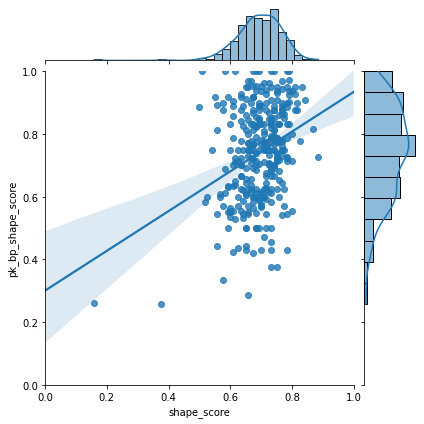

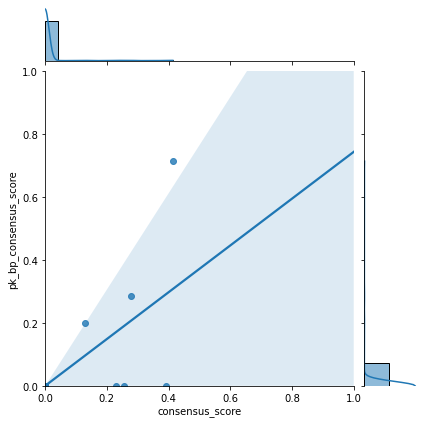

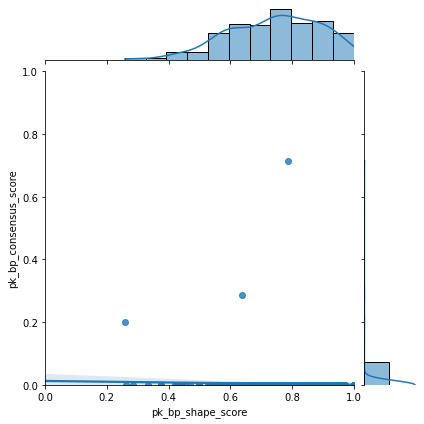

In [71]:
get_graphs(pknots_vs_threshknot)

In [80]:
top = impose_threshold(pknots_vs_threshknot, 0.35, 0.25, 7, 0.1, 0.2)
top.to_csv('/home/gnye8/Desktop/PK_research/pipeline_results/pknots/top_pknots_vs_threshknot.csv')